### Import bibliotek ---> sprawdź proszę, czy są zainstalowane.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

### Rysowanie grafów

In [2]:
G = nx.Graph()
for i in range(5):
    G.add_node((i))
for i in range (0,2):
    G.add_edge(i,i+1)
for i in range (1,2):
    G.add_edge(i,i+1)
for i in range(3,4):
    G.add_edge(i,i+1)
    G.add_edge(1,3)

In [3]:
# Tworzenie grafu pzrez funkcję
def T_pqr(p,q,r):
    G = nx.Graph()
    for i in range(p+q+r):
        G.add_node((i))
    for i in range (0, p+1):
        G.add_edge(i,i+1)
    for i in range (p,p+q):
        G.add_edge(i,i+1)
    for i in range(p+q+1,p+q+r):
        G.add_edge(i,i+1)
        G.add_edge(p,p+q+1)
    return G

### T_pqr DLA UST. p,q,r o skończonych reprezentacjach

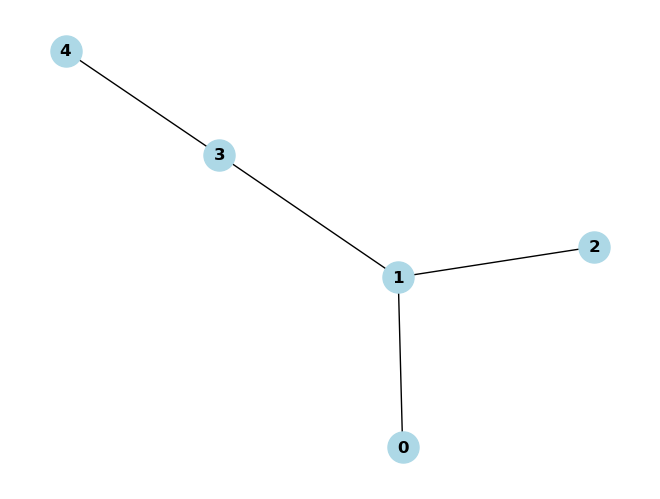

In [4]:
E5 = T_pqr(1,1,2)
labels = {n: G.nodes[n] for n in G.nodes}
nx.draw(E5, with_labels=True, node_size=500, node_color='lightblue', font_weight='bold')
plt.show()

##### WAGI WIERZCHOŁKÓW

In [5]:
def nadawanie_wag(G,  wagi_lista):
    for idx, waga in enumerate(wagi_lista):
        G.add_node(idx, waga=waga)
    
    for node, data in G.nodes(data=True):
        waga = data['waga']
        print(f"Node {node} ma wage {waga}")

### MAPPINGI WIERZCHOŁKÓW

In [6]:
mapping = {0: 2, 1: 3, 2: 4, 3: 5, 4: 0}

H = nx.relabel_nodes(G, mapping)

print("Original nodes:", list(G.nodes()))
print("Relabeled nodes:", list(H.nodes()))

print("Edges in the graph:", H.edges())


Original nodes: [0, 1, 2, 3, 4]
Relabeled nodes: [2, 3, 4, 5, 0]
Edges in the graph: [(2, 3), (3, 4), (3, 5), (5, 0)]


In [7]:
#automatyczny mapping dodający do wierzchołka 1
def mapping(graph):
    mapping = {node: i+1 for i, node in enumerate(graph.nodes())}
    return mapping

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5}

In [8]:
#automatyczny mapping mnożący wierzchołek razy 2
def mapping(graph):
    mapping = {node: 2*i for i, node in enumerate(graph.nodes())}
    return mapping

{0: 0, 1: 2, 2: 4, 3: 6, 4: 8}

### Odbicie

In [9]:
def odbicie2(G, node):
    neighbors = list(G.neighbors(node))
    
    nowa_waga1 = - G.nodes[node]['waga']
    G.nodes[node]['waga'] = nowa_waga1

    for neighbor in neighbors:
        nowa_waga = G.nodes[neighbor]['waga'] -  G.nodes[node]['waga']
        G.nodes[neighbor]['waga'] = nowa_waga
    for node, w in G.nodes(data='waga'):
        print(f" {node} -> {w}")

Odbicie do listy

In [10]:
def odbicie(G, node):
    nadawanie_wag(G, wagi_lista)
    wagi = [] 
    
    neighbors = list(G.neighbors(node))
    
    nowa_waga1 = - G.nodes[node]['waga']
    G.nodes[node]['waga'] = nowa_waga1
    
    for neighbor in neighbors:
        nowa_waga = G.nodes[neighbor]['waga'] -  G.nodes[node]['waga']
        G.nodes[neighbor]['waga'] = nowa_waga
    for _, w in G.nodes(data='waga'):
        wagi.append(w)
    return wagi 

### ORBITY

In [12]:
#### iteruje tak: 0,1,2,3,4,...ostatni_wierzchołek, ,0,1,2,3,4....
def autom1(G):
    wszystkie_wagi = []
    for node in G.nodes():
        odbicie(G, node)
        node_weights = [G.nodes[node]['waga'] for node in G.nodes()]
        wszystkie_wagi.append(node_weights)
        #for node, w in G.nodes(data='waga'):
         #   print(f"Wierzchołek {node} has weight: {w}")
            #print(f"Aplikuję odbicie do wierzchołka:{node}")
        #plt.figure(figsize=(6, 4))
        #pos = nx.spring_layout(G) 
        #nx.draw(G, pos, labels=  node_weights)
        #plt.show()
        return wszystkie_wagi

In [13]:
def autom2(G, iterations):
    node_weights = []

    for _ in range(iterations):
        temp_weights = [] 
        
        for node in G.nodes():
            odbicie(G, node)
            weight = G.nodes[node]['waga']
            temp_weights.append(weight)
        
        node_weights.append(temp_weights) 
    
    return node_weights

### Eliminacja minusów

In [14]:
def pozytywne(G):
    for node, w in G.nodes(data='waga'):
        if w is not None and w < 0:
            return False
    return True

In [15]:
def ro_1(G):    
    for node, data in G.nodes(data='waga'):
        G.nodes[node]['waga'] -= 1
    for node, w in G.nodes(data='waga'):
        print(f"{node} ->: {w}")

In [16]:
def zmiana(G):
    nodes_z_odbiciem = set()
    while not pozytywne(G):
        for node, data in G.nodes(data='waga'):
            if data < 0:
                odbicie(G, node)
                nodes_z_odbiciem.add(node)
        for node, w in G.nodes(data='waga'):
            print(f"{node} -> {w}")

In [17]:
def zmiana(G, count = 0):
    nodes_z_odbiciem = list()
    wagi = []
    while True: 
        nodes_ujemne = [node for node, data in G.nodes(data='waga') if data < 0]
        
        if not nodes_ujemne:
            break
        
        for node in nodes_ujemne:
            odbicie(G, node)
            nodes_z_odbiciem.append(node)
            count +=1
       # for node, w in G.nodes(data='waga'):
       #     print(f"{node} -> {w}")
    for _, w in G.nodes(data='waga'):
        wagi.append(w) 
    print(f"Wierzchołki w kolejności wywoływania:", wagi, nodes_z_odbiciem, count)

In [ ]:
def ro_2(G):
    for node, data in G.nodes(data= 'waga'):
        G.nodes[node]['waga'] +=1
    for node, w in G.nodes(data='waga'):
        print(f"Wierzchołek {node} has weight: {w}")

### Relacje Knutha

In [ ]:
def relations(tableau):
    rows, cols = tableau.shape
    for i in range(rows):
        for j in range(cols - 1):
            if tableau[i, j] > tableau[i, j + 1]:
                tableau[i, j], tableau[i, j + 1] = tableau[i, j + 1], tableau[i, j]

    for i in range(rows - 1):
        for j in range(cols):
            if j == 0 and tableau[i, j] > tableau[i + 1, j]:
                tableau[i, j], tableau[i + 1, j] = tableau[i + 1, j], tableau[i, j]
            elif tableau[i, j] > tableau[i + 1, j] and tableau[i, j - 1] < tableau[i + 1, j]:
                tableau[i, j], tableau[i + 1, j] = tableau[i + 1, j], tableau[i, j]
    
    return tableau

### Kanoniczne bazy

In [ ]:
def wiersze_relacje(tableau):
    for row in tableau:
        for i in range(len(row)-1):
            if row[i] > row[i + 1]:
                row[i], row[i + 1] = row[i + 1], row[i]
    return tableau

# omijanie miejsc minusów